In [1]:
# Daily Percentage Change

In [3]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_datareader
import datetime
import pandas_datareader.data as data

In [4]:
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime(2017, 1, 1)

In [6]:
tesla = data.DataReader("TSLA", "yahoo", start, end)
ford = data.DataReader("F", "yahoo", start, end)
gm = data.DataReader("GM", "yahoo", start, end)

In [16]:
# Two ways to calculate the Daily Percentage Change for the Tesla stock

tesla["Returns"] = (tesla["Close"] / tesla["Close"].shift(1)) - 1

tesla["Returns"] = tesla["Close"].pct_change(1)

In [15]:
tesla["Returns"]

Date
2012-01-03         NaN
2012-01-04   -0.013177
2012-01-05   -0.021292
2012-01-06   -0.007743
2012-01-09    0.012635
                ...   
2016-12-23    0.023459
2016-12-27    0.029015
2016-12-28    0.000957
2016-12-29   -0.023027
2016-12-30   -0.004612
Name: Returns, Length: 1258, dtype: float64

In [19]:
# Doing the same for Ford and GM stocks

ford["Returns"] = ford["Close"].pct_change(1)
gm["Returns"] = gm["Close"].pct_change(1)

<AxesSubplot:>

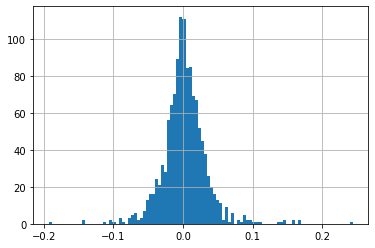

In [20]:
tesla["Returns"].hist(bins = 100)

<AxesSubplot:>

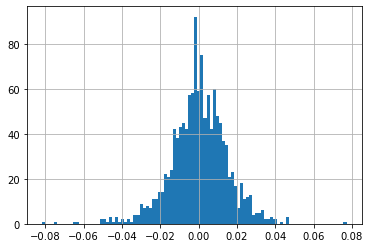

In [21]:
ford["Returns"].hist(bins = 100)

<AxesSubplot:>

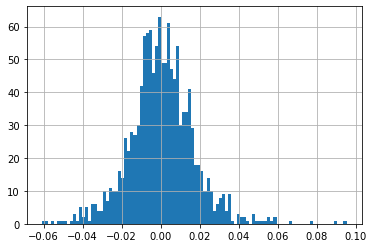

In [22]:
gm["Returns"].hist(bins = 100)

In [23]:
# Plot them on top of each other

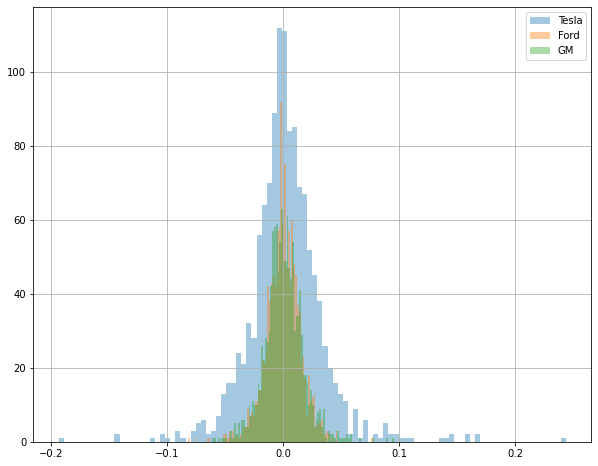

In [26]:
tesla["Returns"].hist(bins = 100, label = "Tesla", figsize = (10, 8), alpha = 0.4)
ford["Returns"].hist(bins = 100, label = "Ford", figsize = (10, 8), alpha = 0.4)
gm["Returns"].hist(bins = 100, label = "GM", figsize = (10, 8), alpha = 0.4)
plt.legend()

In [27]:
# As we can see, Ford and GM tend to be more stable, while Tesla has quite a bit more volatility

In [28]:
# Create a KDE plot

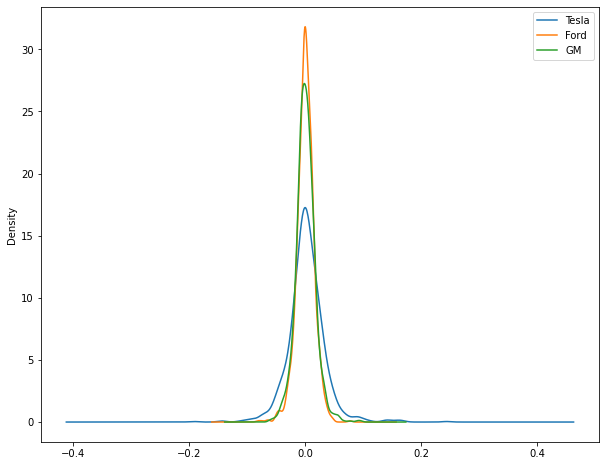

In [30]:
tesla["Returns"].plot(kind = "kde", label = "Tesla", figsize = (10, 8))
ford["Returns"].plot(kind = "kde", label = "Ford", figsize = (10, 8))
gm["Returns"].plot(kind = "kde", label = "GM", figsize = (10, 8))
plt.legend()

In [31]:
# Again we can see that Ford and GM are way more stable than Tesla. Ford is more stable than GM, too

In [32]:
# Create Box plots

<AxesSubplot:>

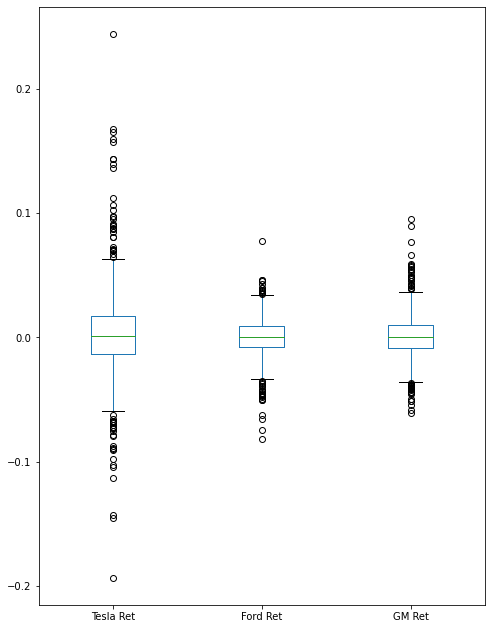

In [38]:
box = pd.concat([tesla["Returns"], ford["Returns"], gm["Returns"]], axis = 1)
box.columns = ["Tesla Ret", "Ford Ret", "GM Ret"]
box.plot(kind = "box", figsize = (8, 11))

In [39]:
# Tesla returns more wide destribution

In [40]:
# Comparing Daily Returns between Stocks

array([[<AxesSubplot:xlabel='Tesla Ret', ylabel='Tesla Ret'>,
        <AxesSubplot:xlabel='Ford Ret', ylabel='Tesla Ret'>,
        <AxesSubplot:xlabel='GM Ret', ylabel='Tesla Ret'>],
       [<AxesSubplot:xlabel='Tesla Ret', ylabel='Ford Ret'>,
        <AxesSubplot:xlabel='Ford Ret', ylabel='Ford Ret'>,
        <AxesSubplot:xlabel='GM Ret', ylabel='Ford Ret'>],
       [<AxesSubplot:xlabel='Tesla Ret', ylabel='GM Ret'>,
        <AxesSubplot:xlabel='Ford Ret', ylabel='GM Ret'>,
        <AxesSubplot:xlabel='GM Ret', ylabel='GM Ret'>]], dtype=object)

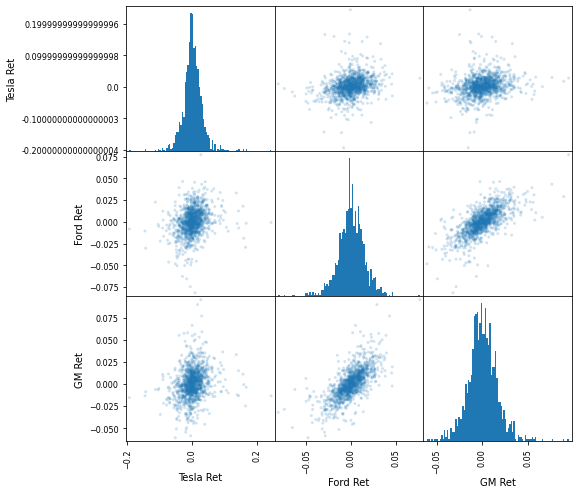

In [43]:
from pandas.plotting import scatter_matrix

scatter_matrix(box, figsize = (8, 8), alpha = 0.2, hist_kwds = {"bins": 100})

In [44]:
# Plot Ford and GM against each other

<AxesSubplot:xlabel='Ford Ret', ylabel='GM Ret'>

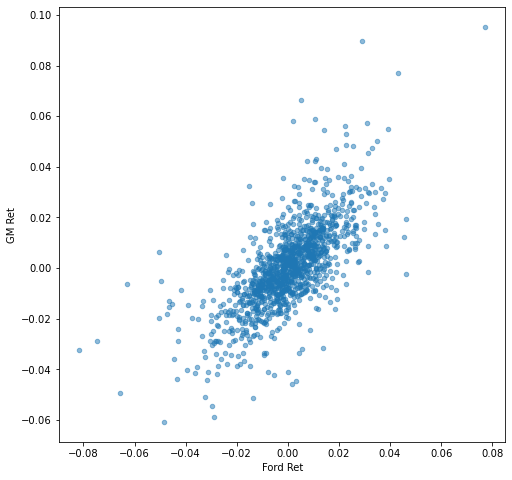

In [49]:
box.plot(kind = "scatter", figsize = (8, 8), alpha = 0.5, x = "Ford Ret", y = "GM Ret")

In [47]:
# There is some correlation

In [50]:
# Cumulative Daily Returns

In [52]:
tesla["Cumulative Return"] = (1 + tesla["Returns"]).cumprod()
ford["Cumulative Return"] = (1 + ford["Returns"]).cumprod()
gm["Cumulative Return"] = (1 + gm["Returns"]).cumprod()

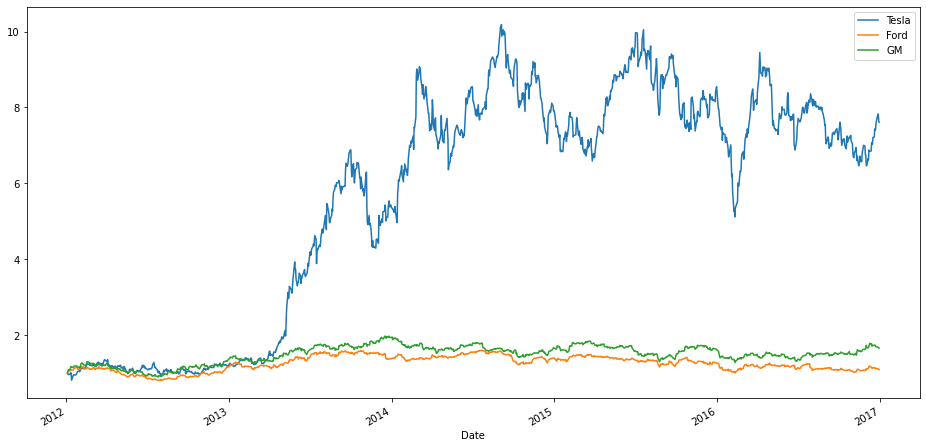

In [55]:
# Plot the Cumulative Return columns against the time series index. Which stock showedthe highest return for a 1$ invested?

tesla["Cumulative Return"].plot(label = "Tesla", figsize = (16, 8))
ford["Cumulative Return"].plot(label = "Ford", figsize = (16, 8))
gm["Cumulative Return"].plot(label = "GM", figsize = (16, 8))
plt.legend()